# Importing modules and Reading files

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading files
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [3]:
#Making copies to maintain the originality of the data
train_original = train.copy()
test_original = test.copy()

# Understanding data

In [4]:
print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [5]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [6]:
print("Train: ")
print(train.isnull().sum())
print("Test:")
print(test.isnull().sum())

Train: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Test:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Univariate Analysis

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#In Proportion
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

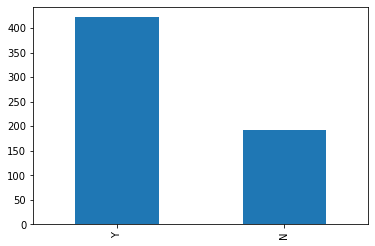

In [11]:
#Plotting Dependent Variable
train['Loan_Status'].value_counts().plot.bar()

# Plotting independent variable (Categorical)

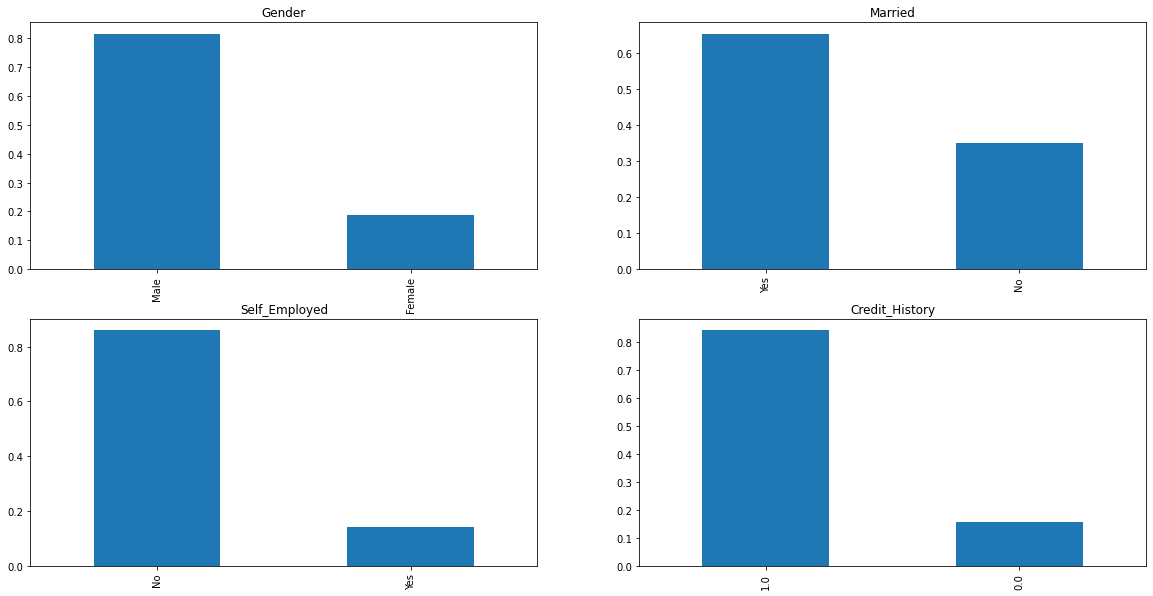

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")
plt.show()

# Plotting Independent Variable (Ordinal & Nominal)

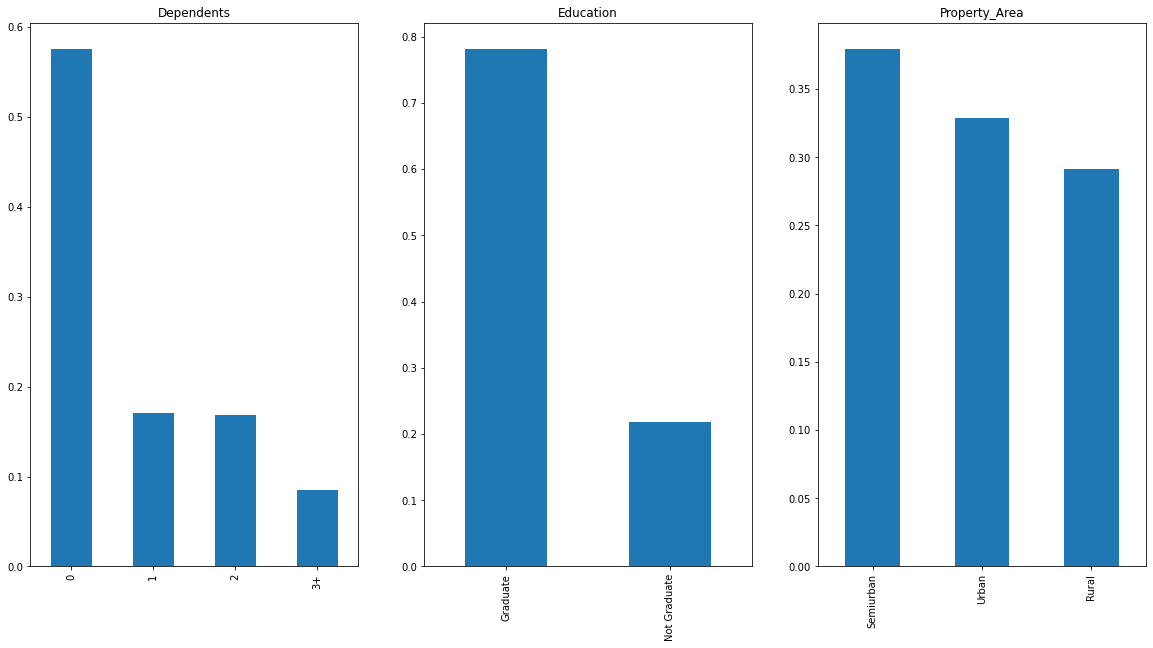

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Property_Area")
plt.show()

# Plotting Independent Variable (Numerical)

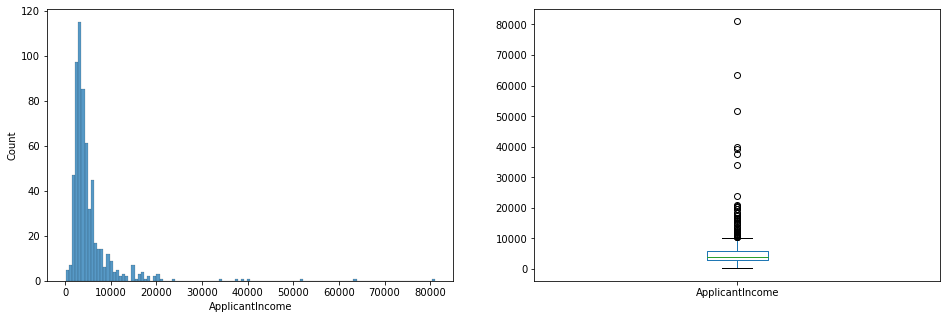

In [14]:
plt.figure(1)
plt.subplot(121)
sns.histplot(train["ApplicantIncome"])
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

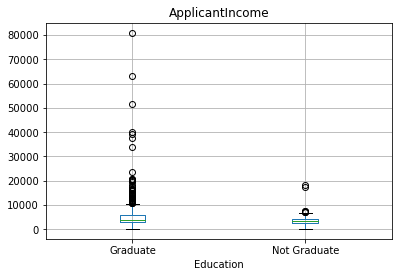

In [15]:
# Checking the applicant income on education level due to too much outlier
train.boxplot(column="ApplicantIncome",by = 'Education')
plt.suptitle("")

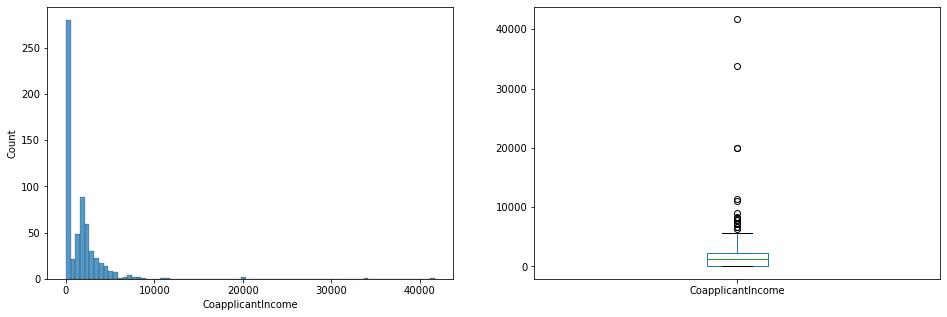

In [16]:
# Checking CoApplicants now
plt.figure(1)
plt.subplot(121)
sns.histplot(train["CoapplicantIncome"])
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

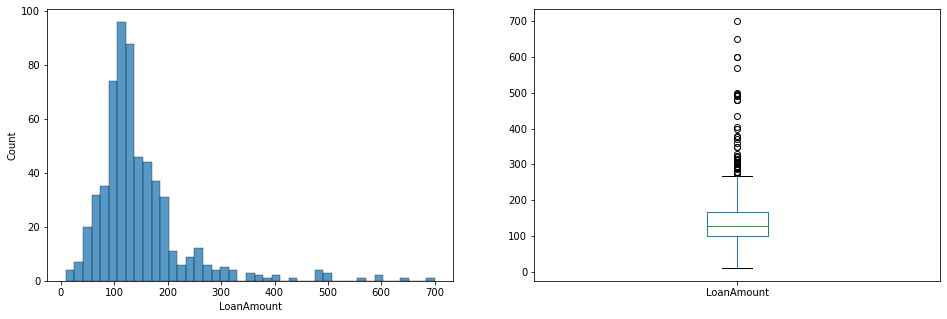

In [17]:
#Checking for LoanAMount
plt.figure(1)
plt.subplot(121)
sns.histplot(train["LoanAmount"])
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

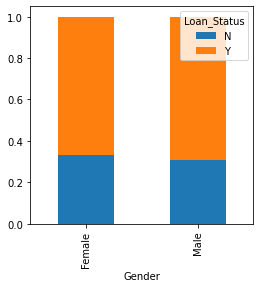

In [18]:
# Categorical Variable vs Dependent Variable i.e. Between Gender and Loan Status
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

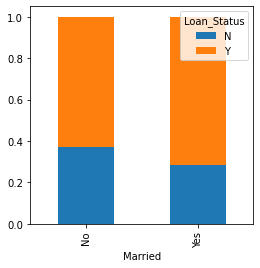

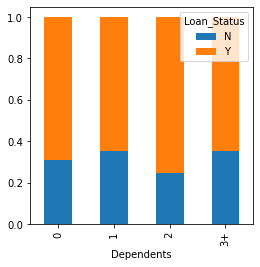

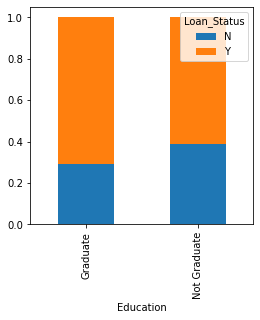

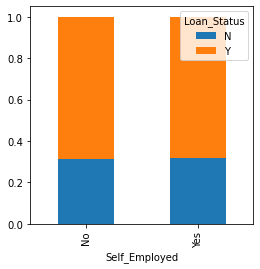

In [19]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

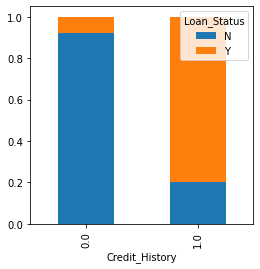

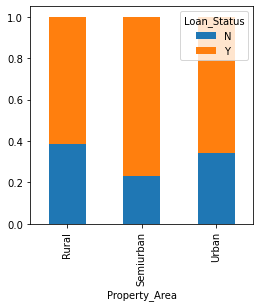

In [20]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

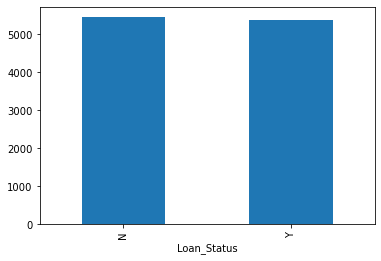

In [21]:
# Numerical Independent Variable vs Target variable
#Mean Income of the people for which loan is approved vs the mean income of the people for which loan is not approved
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

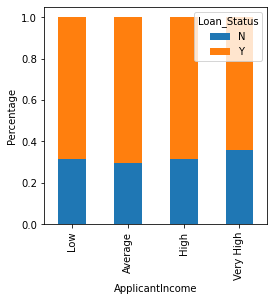

In [22]:
# Making bins for the ApplicantIncome variable based on the values in it and analyzing the corresponding loan status
# for each bin

bins = [0, 2500, 4000, 6000, 8100]
group = ['Low','Average','High','Very High']

train['Income_Bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_Bin = pd.crosstab(train['Income_Bin'],train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

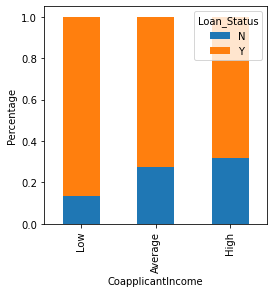

In [23]:
bins = [0, 1000, 3000, 4200]
group = ['Low','Average','High']

train['Coapplicant_Income_Bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_Bin = pd.crosstab(train['Coapplicant_Income_Bin'],train['Loan_Status'])
Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

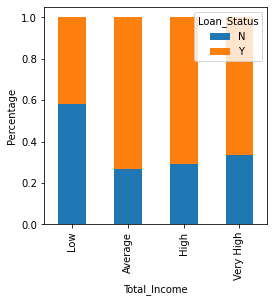

In [24]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 8100]
group = ['Low','Average','High','Very High']

train['Total_Income_Bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_Bin = pd.crosstab(train['Total_Income_Bin'],train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

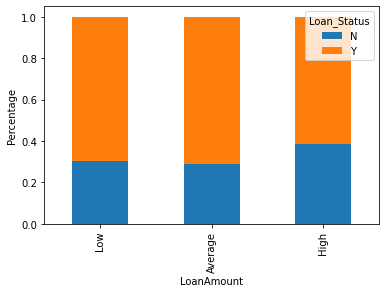

In [25]:
# Checking Loan Amount Variable
bins = [0, 100, 200, 700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels = group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

In [26]:
# Dropping the variables created by us
train = train.drop(['Income_Bin','Coapplicant_Income_Bin','LoanAmount_bin','Total_Income_Bin','Total_Income'],axis=1)

#Converting Categorical Variable to numerical to find correlation
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
    
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

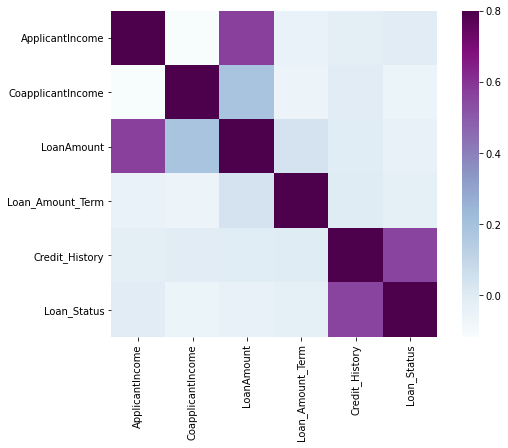

In [27]:
#Seeing Correlation
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

# Filling missing values and outlier treatment

In [28]:
# Less Missing values thus can be filled with mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [29]:
# Checking for Loan Term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
#Filling it with 360
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [31]:
#Numerical Variable
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

AttributeError: 'Rectangle' object has no property 'bin'

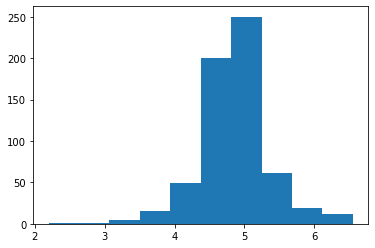

In [34]:
#Resolving outlier by taking the log transformation
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bin=20)

In [35]:
test['LoanAmount_Log'] = np.log(test['LoanAmount'])

# Working on model

In [36]:
#Dropping loan ID

In [37]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [38]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [39]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [43]:
pred_cv = model.predict(x_cv)

In [44]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [45]:
pred_test = model.predict(test)

In [46]:
submissions = pd.read_csv('sample_submission_49d68Cx.csv')

In [47]:
submissions['Loan_Status'] = pred_test
submissions['Loan_ID'] = test_original['Loan_ID']

In [48]:
submissions['Loan_Status'].replace(0,'N',inplace=True)
submissions['Loan_Status'].replace(1,'Y',inplace=True)

In [49]:
pd.DataFrame(submissions, columns=['Loan_ID','Loan_Status']).to_csv('logisticAGain.csv')

# Model 2 using stratified k fold cross validation

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test1 = model.predict(xvl)
    score = accuracy_score(yvl,pred_test1)
    print('accuracy_score ',score)
    i+=1
    pred_test1 = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of Kfold 5
accuracy_score  0.8048780487804879

2 of Kfold 5
accuracy_score  0.8373983739837398

3 of Kfold 5
accuracy_score  0.7804878048780488

4 of Kfold 5
accuracy_score  0.7886178861788617

5 of Kfold 5
accuracy_score  0.7950819672131147


C:\Users\anant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

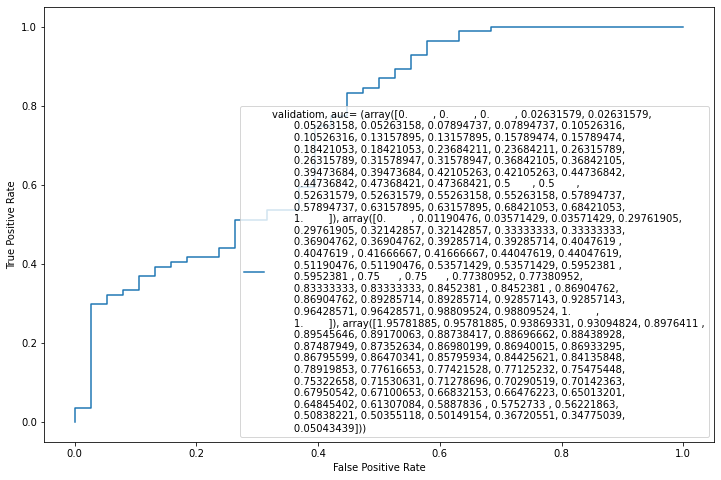

In [52]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_curve(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validatiom, auc= "+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [53]:
submissions['Loan_Status'] = pred_test1
submissions['Loan_ID'] = test_original['Loan_ID']
submissions['Loan_Status'].replace(0,'N',inplace=True)
submissions['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submissions, columns=['Loan_ID','Loan_Status']).to_csv('logistic1Again.csv')

# Creating new features using feature engineering

In [54]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Count'>

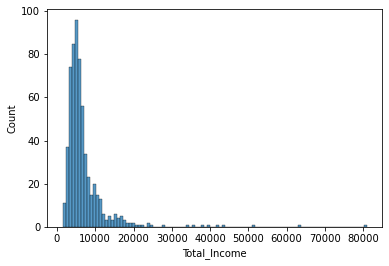

In [55]:
sns.histplot(train['Total_Income'])

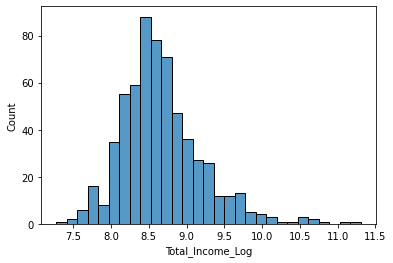

In [56]:
train['Total_Income_Log'] = np.log(train['Total_Income'])
sns.histplot(train['Total_Income_Log']);
test['Total_Income_Log'] = np.log(test['Total_Income'])

<AxesSubplot:xlabel='EMI', ylabel='Count'>

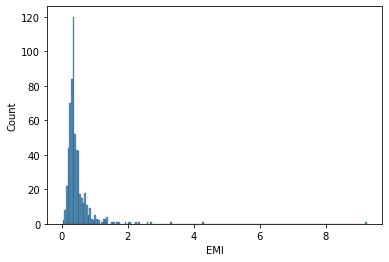

In [57]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
sns.histplot(train['EMI'])

In [58]:
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) #mulitply 1000 to make unit equal
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000) #mulitply 1000 to make unit equal

<AxesSubplot:xlabel='Balance Income', ylabel='Count'>

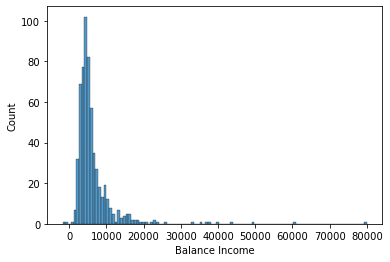

In [59]:
sns.histplot(train['Balance Income'])

In [60]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

## Going for new models

In [61]:
X = train.drop('Loan_Status',1)
Y = train.Loan_Status # Target variable in different dataset

### Logistic Regression

In [62]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,Y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = Y.iloc[train_index],Y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test1 = model.predict(xvl)
    score = accuracy_score(yvl,pred_test1)
    print('accuracy_score ',score)
    i+=1
    pred_test1 = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of Kfold 5
accuracy_score  0.7886178861788617

2 of Kfold 5
accuracy_score  0.6910569105691057

3 of Kfold 5
accuracy_score  0.6666666666666666

4 of Kfold 5
accuracy_score  0.7804878048780488

5 of Kfold 5
accuracy_score  0.680327868852459


In [63]:
submissions['Loan_Status'] = pred_test1
submissions['Loan_ID'] = test_original['Loan_ID']
submissions['Loan_Status'].replace(0,'N',inplace=True)
submissions['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submissions, columns=['Loan_ID','Loan_Status']).to_csv('log1.csv')

### Decision Tree

In [64]:
from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,Y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = Y.iloc[train_index],Y.iloc[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test1 = model.predict(xvl)
    score = accuracy_score(yvl,pred_test1)
    print('accuracy_score ',score)
    i+=1
    pred_test1 = model.predict(test)


1 of Kfold 5
accuracy_score  0.7398373983739838

2 of Kfold 5
accuracy_score  0.6991869918699187

3 of Kfold 5
accuracy_score  0.7560975609756098

4 of Kfold 5
accuracy_score  0.7073170731707317

5 of Kfold 5
accuracy_score  0.6721311475409836


In [65]:
submissions['Loan_Status'] = pred_test1
submissions['Loan_ID'] = test_original['Loan_ID']
submissions['Loan_Status'].replace(0,'N',inplace=True)
submissions['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submissions, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree.csv')

### XG Boost

In [73]:
from xgboost import XGBClassifier
i = 1
kf = StratifiedKFold(n_splits=2, random_state=2, shuffle=True)
for train_index,test_index in kf.split(X,Y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = Y.iloc[train_index],Y.iloc[test_index]
    model = XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test1 = model.predict(xvl)
    score = accuracy_score(yvl,pred_test1)
    print('accuracy_score ',score)
    i+=1
    pred_test1 = model.predict(test)
    pred3 = model.predict_proba(test)[:,1]


1 of Kfold 2
accuracy_score  0.7947882736156352

2 of Kfold 2
accuracy_score  0.8013029315960912


In [74]:
submissions['Loan_Status'] = pred_test1
submissions['Loan_ID'] = test_original['Loan_ID']
submissions['Loan_Status'].replace(0,'N',inplace=True)
submissions['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submissions, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')